<a href="https://colab.research.google.com/github/sepaharvey/Fantasy-Football-Python-Refresh/blob/main/Section_5_Data_Munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#view the version

print(pd.__version__)

import warnings; warnings.simplefilter('ignore')

2.1.4


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/01-FDP%20Projections%20-%20(2023.03.30).csv')

df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(10)

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0
5,Justin Fields,CHI,QB,4304,17,24,189,991,4,0,0,0
6,Justin Herbert,LAC,QB,4329,33,12,48,272,2,0,0,0
7,Trevor Lawrence,JAC,QB,5359,17,26,91,470,3,0,0,0
8,Dak Prescott,DAL,QB,4560,27,9,47,255,3,0,0,0
9,Daniel Jones,NYG,QB,4080,31,16,69,381,3,0,0,0


In [6]:
df[:5]

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0


In [7]:
df.iloc[10:15,0:10]

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions
10,Tua Tagovailoa,MIA,QB,4514,26,16,38,201,5,0
11,Kirk Cousins,MIN,QB,4498,32,6,13,78,0,0
12,Deshaun Watson,CLE,QB,3795,25,4,63,355,1,0
13,Trey Lance,SFO,QB,2639,23,9,127,710,4,0
14,Kyler Murray,ARI,QB,3229,18,11,84,487,4,0


In [8]:
df.columns

Index(['Player', 'Team', 'Pos', 'PassingYds', 'PassingTD', 'Int', 'RushingAtt',
       'RushingYds', 'RushingTD', 'Receptions', 'ReceivingYds', 'ReceivingTD'],
      dtype='object')

In [9]:
', '.join(df.columns)

'Player, Team, Pos, PassingYds, PassingTD, Int, RushingAtt, RushingYds, RushingTD, Receptions, ReceivingYds, ReceivingTD'

In [10]:
scoring_weights = {
    'receptions' : 0.5,  #half ppr
    'receiving_yds' : 0.1,
    'receiving_td' : 6,
    'rushing_yds' : 0.1,
    'rushing_td' : 6,
    'passing_yds' : 0.04,
    'passing_td' : 4,
    'int' : -2
}

In [11]:
df['FantasyPoints'] = (
    df['Receptions'] * scoring_weights['receptions'] +
    df['ReceivingYds'] * scoring_weights['receiving_yds'] +
    df['ReceivingTD'] * scoring_weights['receiving_td'] +
    df['RushingYds'] * scoring_weights['rushing_yds'] +
    df['RushingTD'] * scoring_weights['rushing_td']+
    df['PassingYds'] * scoring_weights['passing_yds'] +
    df['PassingTD'] * scoring_weights['passing_td'] +
    df['Int'] * scoring_weights['int']
)

In [12]:
df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0,413.44
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0,402.10
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0,396.30
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0,364.60
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0,373.28


In [13]:
# mask our DataFrame based off a position
"""
.loc is a way of getting back specified cross sections of your DataFrame.

The syntax is as follows:

new_df = old_df.loc[row_indexer, column_indexer]

Where row_indexer can take the form of a boolean indexer.

For example, df['Pos'] == 'RB'

or, df['RushingAtt'] > 20

or, df['Pos'].isin(['QB', 'WR', 'RB', TE]) # check if a player's position is a skill position

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html # docs on loc

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html # docs on indexing

"""


rb_df = df.loc[df['Pos']=='RB']

rb_df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
45,Christian McCaffrey,SFO,RB,0,0,0,299,1314,8,114,1059,3,360.3
46,Jonathan Taylor,IND,RB,0,0,0,329,1787,16,37,340,2,339.2
47,Austin Ekeler,LAC,RB,0,0,0,205,906,12,69,615,8,306.6
48,Saquon Barkley,NYG,RB,0,0,0,318,1225,3,79,506,3,248.6
49,Kenneth Walker III,SEA,RB,0,0,0,293,1212,8,54,434,1,245.6


In [16]:
base_columns = ['Player', 'Team', 'Pos']

rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD']

"""

Here, we can mask (what we are doing in the row indexer) and filter (what we are doing in the column indexer)
all in one line. Pass in (the boolean indexer, columns you'd like to keep) as a tuple.

Also recall that lists can be concatenated together.


"""

rb_df = df.loc[df['Pos']=='RB', base_columns + rushing_columns]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
45,Christian McCaffrey,SFO,RB,360.3,114,1059,3,299,1314,8
46,Jonathan Taylor,IND,RB,339.2,37,340,2,329,1787,16
47,Austin Ekeler,LAC,RB,306.6,69,615,8,205,906,12
48,Saquon Barkley,NYG,RB,248.6,79,506,3,318,1225,3
49,Kenneth Walker III,SEA,RB,245.6,54,434,1,293,1212,8


In [18]:
"""
The sort_values method of a DataFrame allows us sort our table by a given column.

The 'by' parameter of the function here is a required argument, and it should be the name of
one of the columns in your table.

The 'ascending' argument is optional. If you want to sort your table from largest to smallest, set

ascending = False to sort in descending order. The object we get back from the sort_values function
is also a pandas DataFrame, and so we can chain methods as we do below with sort_values and head.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

"""


# sort RBs by RushingYds in descending order and get us back the top 15 rows.
rb_df.sort_values(by='RushingYds', ascending = False).head(15)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
46,Jonathan Taylor,IND,RB,339.2,37,340,2,329,1787,16
54,Nick Chubb,CLE,RB,224.7,21,202,1,259,1340,9
45,Christian McCaffrey,SFO,RB,360.3,114,1059,3,299,1314,8
51,Derrick Henry,TEN,RB,241.7,24,204,0,313,1313,13
55,Rhamondre Stevenson,NWE,RB,225.6,29,240,0,256,1271,10
48,Saquon Barkley,NYG,RB,248.6,79,506,3,318,1225,3
61,Dalvin Cook,MIN,RB,199.0,35,234,0,259,1221,6
49,Kenneth Walker III,SEA,RB,245.6,54,434,1,293,1212,8
52,Travis Etienne Jr.,JAC,RB,210.0,47,380,0,270,1125,6
53,Breece Hall,NYJ,RB,225.3,49,405,1,264,1123,7


In [21]:
"""
We can use the describe method to get summary/descriptive statistics about our DataFrame extremely quickly

We can also use transpose to switch the columns and index.

# describe docs

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

# transpose documentation

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html

"""

# get us back descriptive stats about our rb_df and transpose the DataFrame.
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,80.0,125.6650,73.613386,31.4,63.65,111.35,171.75,360.3
Receptions,80.0,27.0625,18.768641,4.0,13.00,24.00,33.50,114.0
ReceivingYds,80.0,215.3000,153.126026,33.0,106.75,189.50,265.75,1059.0
ReceivingTD,80.0,0.8000,1.286739,0.0,0.00,0.00,1.00,8.0
RushingAtt,80.0,141.0750,79.015265,27.0,73.75,126.00,190.50,329.0
RushingYds,80.0,618.0375,360.409452,113.0,309.00,570.00,830.75,1787.0
RushingTD,80.0,4.0000,3.260815,0.0,2.00,3.00,5.00,16.0


In [26]:
"""
This is how you get back a Series object, or column, from your DataFrame.
Here, we just want the first 10 rows of our Series object.

Documentation on pandas Series objects. Below, we cover some aggregate functions we can run
on these Series objects.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

"""

rb_df['RushingAtt'][:10]

,RushingAtt
45,299
46,329
47,205
48,318
49,293
50,254
51,313
52,270
53,264
54,259


In [27]:
rb_df['RushingAtt'].max()

329

In [28]:
rb_df['RushingAtt'].std()

79.01526450829901

In [30]:
rb_df['RushingAtt'].min()

27

In [33]:
rb_df['RushingAtt'].quantile(0.75) #Series 75th percentil for RushingAtt

190.5

In [36]:
rb_df['RushingAtt'].quantile(0.25) #Series 25th percentil for RushingAtt

73.75

In [56]:
"""
The rank method can be used to rank players based on a given column.

Set ascending = False to rank the column in descending order.

We will be using this rank players on value over replacement and also on ADP.

"""


rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)


rb_df.sort_values(by='RushingTDRank').head(5)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,RushingTDRank
46,Jonathan Taylor,IND,RB,339.2,37,340,2,329,1787,16,1.0
51,Derrick Henry,TEN,RB,241.7,24,204,0,313,1313,13,2.0
47,Austin Ekeler,LAC,RB,306.6,69,615,8,205,906,12,3.0
66,J.K. Dobbins,BAL,RB,184.1,20,138,0,151,943,11,4.0
55,Rhamondre Stevenson,NWE,RB,225.6,29,240,0,256,1271,10,6.0


In [57]:
"""
The value_counts is a Series method can be used to find the number of occurances in a column.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

Notice that the value_counts method is for Series', not DataFrames.
"""

rb_df['Team'].value_counts()

,count
Team,
FA,11
SFO,4
KAN,4
JAC,3
BAL,3
DEN,3
BUF,3
NYJ,3
LAC,3


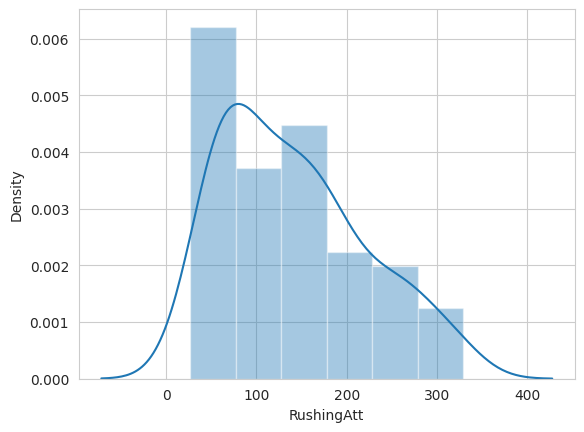

In [59]:
"""
We can also visualize this data in the same fashion.
"""
import seaborn as sns

sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt']);

In [60]:
"""
values is how we get back a Numpy array representation of our data. Underneath the hood of Pandas,
DataFrames are multi-dimensional arrays. We will cover Numpy arrays in more detail in the machine learning section.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html
"""

rb_df.values[:5]

array([['Christian McCaffrey', 'SFO', 'RB', 360.3, 114, 1059, 3, 299,
        1314, 8, 11.0],
       ['Jonathan Taylor', 'IND', 'RB', 339.20000000000005, 37, 340, 2,
        329, 1787, 16, 1.0],
       ['Austin Ekeler', 'LAC', 'RB', 306.6, 69, 615, 8, 205, 906, 12,
        3.0],
       ['Saquon Barkley', 'NYG', 'RB', 248.6, 79, 506, 3, 318, 1225, 3,
        44.0],
       ['Kenneth Walker III', 'SEA', 'RB', 245.60000000000002, 54, 434,
        1, 293, 1212, 8, 11.0]], dtype=object)